<a href="https://colab.research.google.com/github/rahiakela/genai-research-and-practice/blob/main/gaig-layout-lm-v3/part_2_gaig_dataset_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

**Reference**:

https://medium.com/@shivarama/layoutlmv3-from-zero-to-hero-part-2-d2659eaa7dee

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets seqeval
!pip install accelerate -U

In [ ]:
!unzip dataset_layoutlm_v3.zip

## Load dataset

In [ ]:
from datasets import load_dataset

# this dataset uses the new Image feature :)
dataset = load_dataset("./dataset_layoutlm_v3.py", trust_remote_code=True)

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/utils/file_utils.py:1491: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


["{'id': 2, 'file_name': 'dc03d74d-page_1.png', 'tokens': ['73,962,999.00', '4-28-2023', '4-28-24'], 'bboxes': [[1127, 1829, 1342, 1865], [429, 834, 583, 865], [889, 830, 1034, 881]], 'ner_tags': [15, 10, 11]}", "{'id': 23, 'file_name': '73cbce30-page_0.png', 'tokens': ['_Mega', 'Lab-Health', 'Care', 'Svc,', 'LLC', '2296', 'Opitz', 'Blvd,', 'Suite', '260', 'Woodbridge', '_', '22191', '05/27/2012', 'www.megalabservices.com', 'Medical', 'Laboratory', '850,000.00', '850,000.00', '450,000.00', '450,000.00', '1,200,000.00', '1,200,000.00'], 'bboxes': [[391, 1358, 459, 1381], [469, 1359, 605, 1380], [616, 1360, 675, 1380], [685, 1360, 730, 1381], [748, 1360, 798, 1381], [494, 1436, 556, 1456], [567, 1436, 632, 1461], [641, 1436, 700, 1460], [711, 1437, 774, 1457], [783, 1437, 828, 1458], [305, 1513, 494, 1541], [472, 1504, 495, 1558], [2023, 1520, 2097, 1542], [1038, 1594, 1183, 1622], [1624, 1599, 1966, 1622], [628, 1933, 723, 1955], [733, 1934, 867, 1960], [1369, 2727, 1510, 2753], [821, 2

Generating test split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/utils/file_utils.py:1491: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


["{'id': 7, 'file_name': 'a899f615-page_0.png', 'tokens': ['Dynamic', 'Engineering', 'Consultants', 'PC', 'Main', 'Street', 'Lake', 'Como', 'New', 'Jersey', '07719', 'Land', 'Development', 'Www.dynamicec.com', '04/01/2004', '$', '_51', 'milloin'], 'bboxes': [[449, 611, 586, 645], [600, 611, 787, 645], [801, 610, 989, 638], [1004, 610, 1049, 638], [615, 681, 677, 704], [689, 680, 768, 704], [259, 746, 326, 771], [338, 746, 422, 771], [282, 813, 342, 837], [352, 813, 443, 843], [1318, 811, 1413, 837], [700, 879, 768, 904], [782, 879, 971, 910], [454, 1076, 780, 1110], [678, 948, 845, 974], [633, 1217, 648, 1245], [681, 1209, 709, 1234], [728, 1209, 816, 1234]], 'ner_tags': [0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 8, 8, 5, 7, 15, 15, 15]}", "{'id': 42, 'file_name': '5e4ad096-page_0.png', 'tokens': ['Gabriel', 'Roeder', 'Smith', '&', 'Company', 'Holdings', 'and', 'all', 'subsidiaries', 'One', 'Towne', 'Square', 'Suite', '800', 'Southfield,', 'MI', '48076', 'www.arsconsulting.com', '1962', 'Actuar

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 41
    })
    test: Dataset({
        features: ['id', 'tokens', 'bboxes', 'ner_tags', 'image_path', 'image'],
        num_rows: 5
    })
})

In [ ]:
dataset["train"].features

{'id': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bboxes': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'ner_tags': Sequence(feature=ClassLabel(names=['APPLICANT_NAME', 'APPLICANT_ADDRESS', 'APPLICANT_CITY', 'APPLICANT_STATE', 'APPLICANT_ZIP', 'APPLICANT_WEBSITE_1', 'APPLICANT_WEBSITE_2', 'EST_DATE', 'NATURE_BUSINESS_BLANK_DESC', 'APPLICANT_COUNTRY', 'EFFECTIVE_DATE', 'EXPIRATION_DATE', 'REVENUE_CURRENT_YEAR', 'REVENUE_CURRENT_YEAR_DOMESTIC', 'REVENUE_CURRENT_YEAR_FOREIGN', 'REVENUE_PRIOR_YEAR', 'REVENUE_PRIOR_YEAR_DOMESTIC', 'REVENUE_PRIOR_YEAR_FOREIGN', 'REVENUE_NEXT_YEAR', 'REVENUE_NEXT_YEAR_DOMESTIC', 'REVENUE_NEXT_YEAR_FOREIGN'], id=None), length=-1, id=None),
 'image_path': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None)}

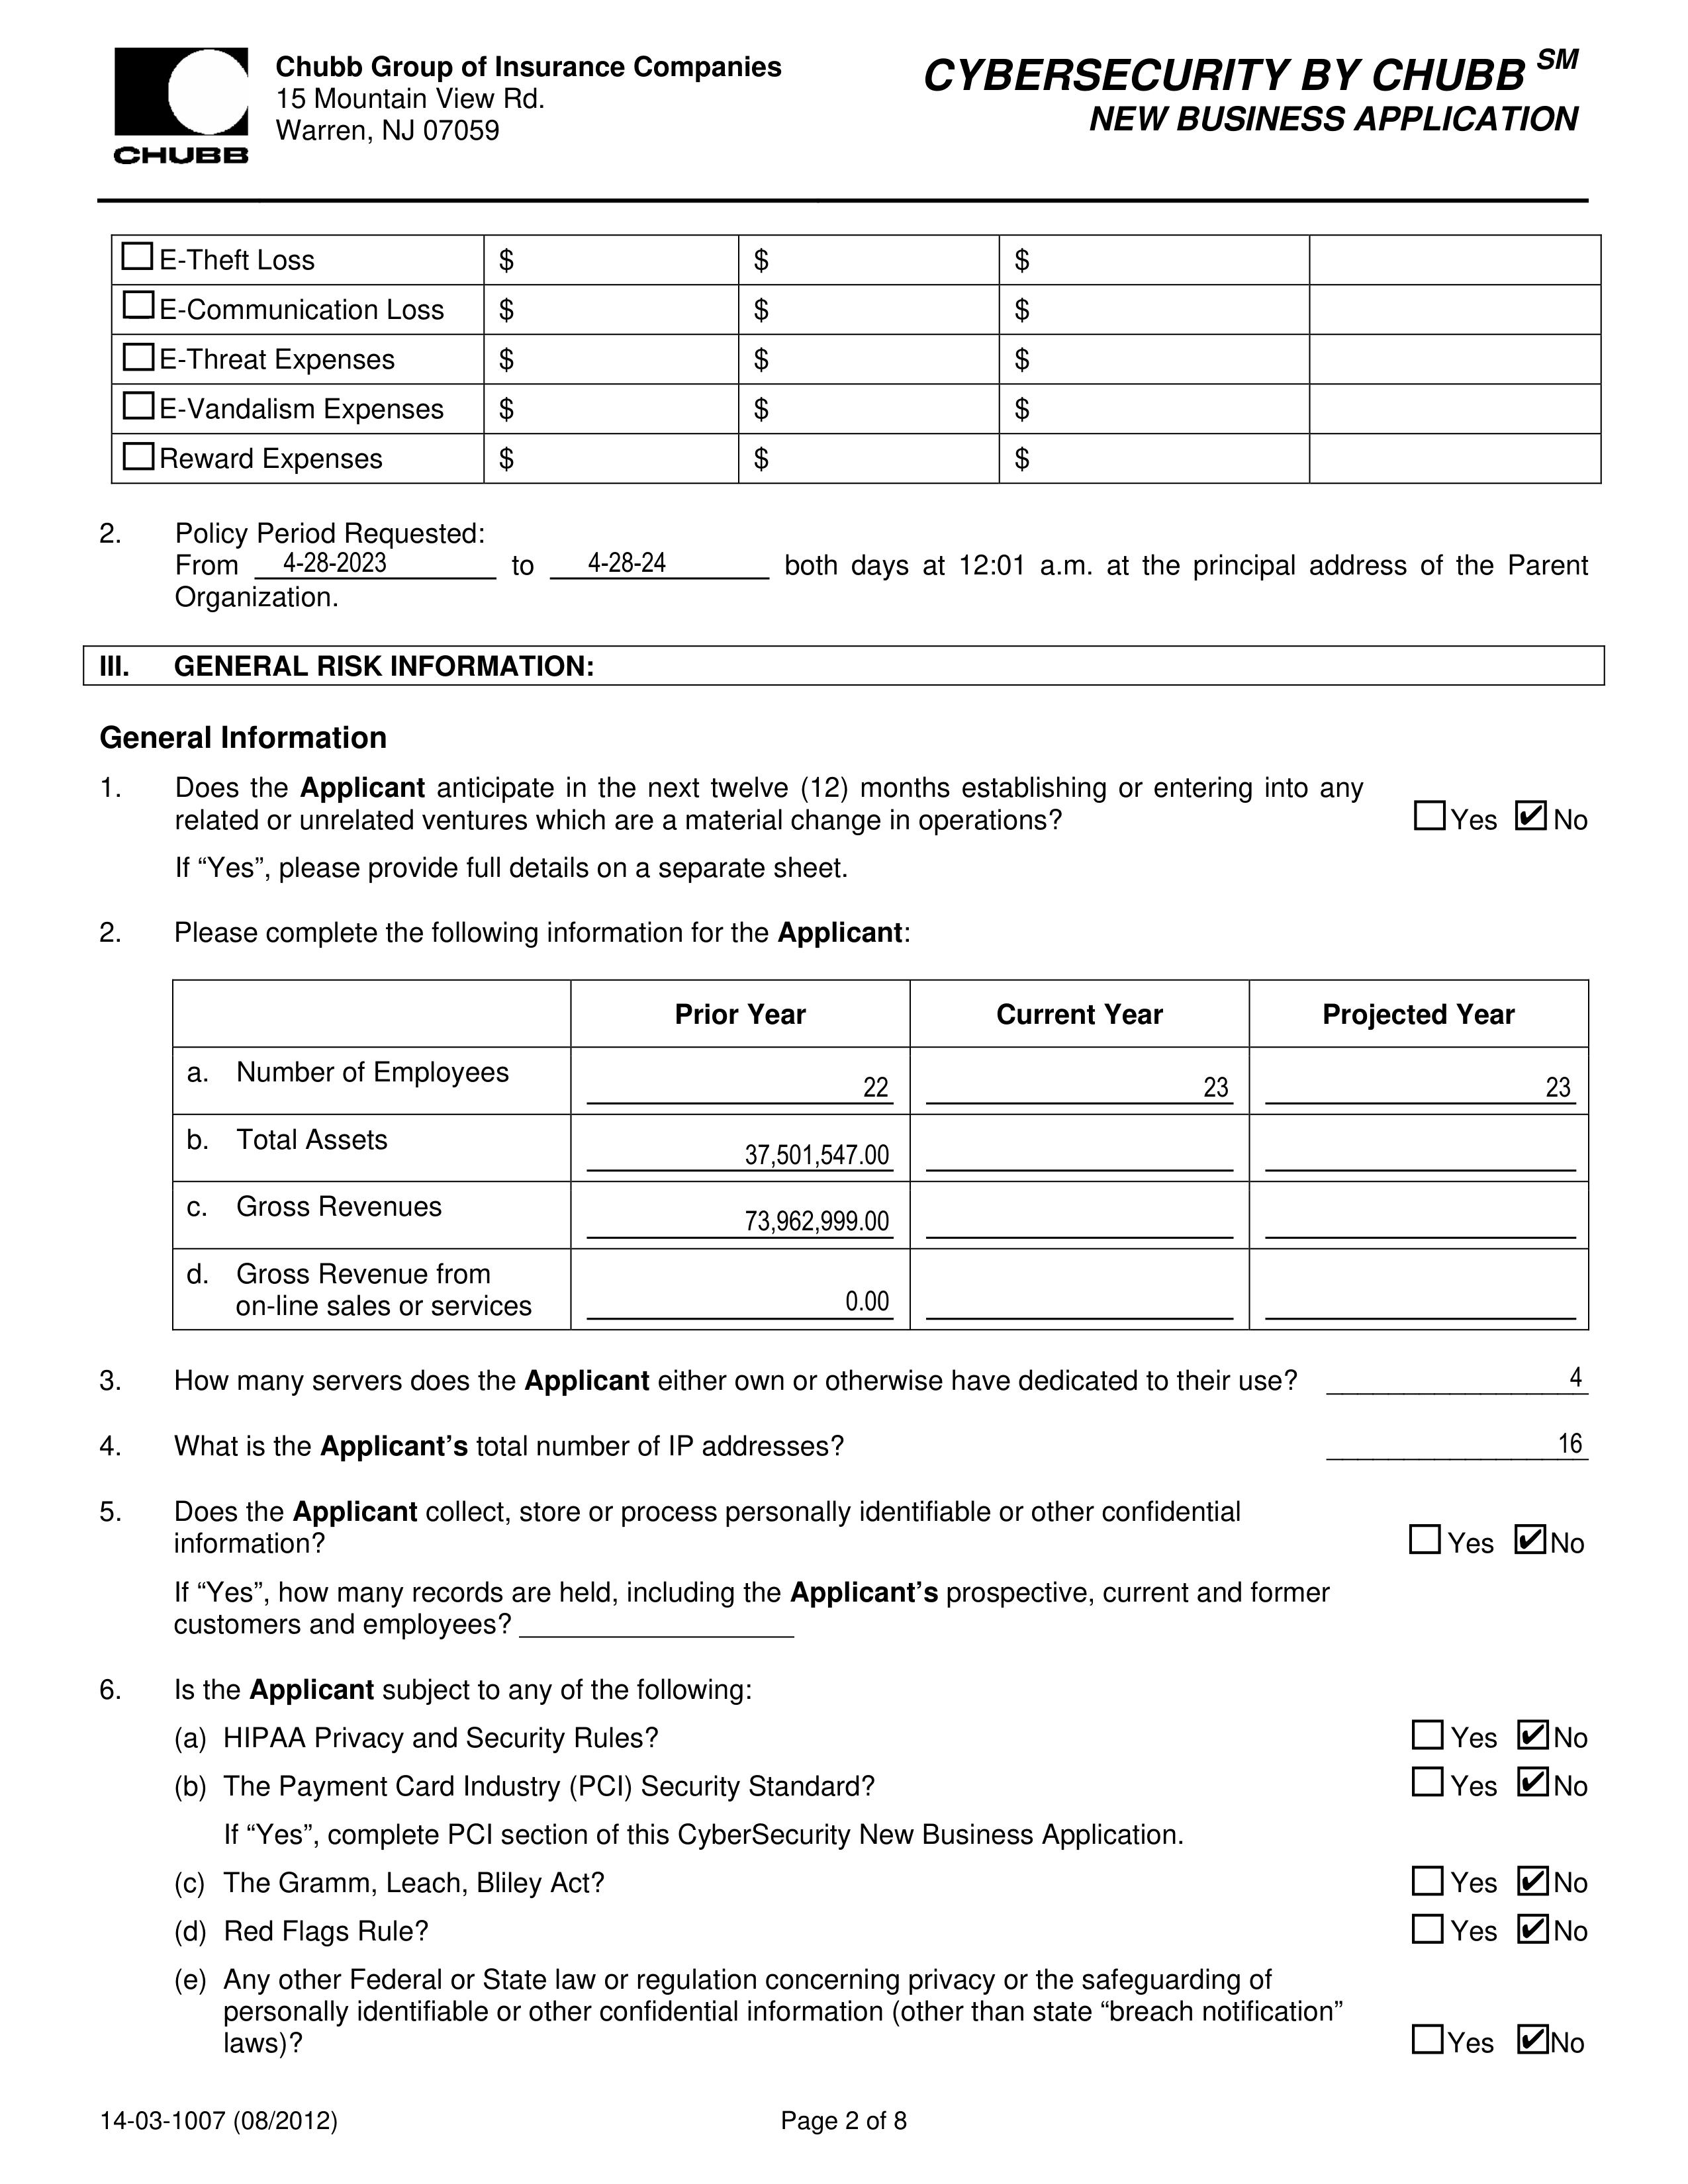

In [ ]:
# Inspect one of the annotated images
example = dataset["train"][0]
example["image"]